In [36]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

#submuestreo del data frame 

df1 = pd.read_csv('df_listo.csv')
##df1=df.sample(5000,random_state=42)

y = df1['Nombre de la entidad_codificado'] 
X = df1.drop(['Nombre de la entidad_codificado'], axis = 1)
y_corrected = np.where(y == 31, 1, y)
X_train, X_test, y_train, y_test = train_test_split(X, y_corrected, test_size = 0.2)

df1


,Tipo de afiliado_ADICIONAL,Tipo de afiliado_BENEFICIARIO,Tipo de afiliado_COTIZANTE,Estado del afiliado_Activo,Estado del afiliado_ProtecciÃ³n Laboral C,CondiciÃ³n del beneficiario_DISCAPACIDAD,CondiciÃ³n del beneficiario_ESTUDIANTE,CondiciÃ³n del beneficiario_NO APLICA,Zona de AfiliaciÃ³n_Rural,Zona de AfiliaciÃ³n_Urbana,GÃ©nero_Femenino,GÃ©nero_Masculino,Grupo etario_codificado,Nombre de la entidad_codificado,Departamento_codificado
0,0,0,1,1,0,0,0,1,1,0,0,1,2,2,10
1,0,0,1,1,0,0,0,1,0,1,1,0,5,23,29
2,0,1,0,1,0,0,0,1,0,1,1,0,4,15,1
3,0,0,1,1,0,0,0,1,0,1,1,0,1,20,10
4,0,1,0,1,0,0,0,1,0,1,0,1,9,23,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305242,0,1,0,1,0,0,0,1,1,0,1,0,1,27,6
305243,0,0,1,1,0,0,0,1,1,0,1,0,6,9,12
305244,0,1,0,1,0,0,0,1,1,0,1,0,10,27,10
305245,0,1,0,0,1,0,0,1,0,1,1,0,4,4,19


### Random forest


In [37]:
rfc = RandomForestClassifier(
    n_estimators=80,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=4,
    bootstrap=False
)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.00      0.00      0.00      5616
           2       0.00      0.00      0.00      1301
           3       0.00      0.00      0.00      2369
           4       0.00      0.00      0.00      3712
           5       0.00      0.00      0.00       156
           6       0.00      0.00      0.00       477
           7       0.00      0.00      0.00       244
           8       0.00      0.00      0.00      1307
           9       0.00      0.00      0.00        99
          10       0.00      0.00      0.00       175
          11       0.00      0.00      0.00      1324
          12       0.00      0.00      0.00       339
          13       0.00      0.00      0.00       497
          14       0.00      0.00      0.00      1041
          15       0.00      0.00      0.00      3657
          16       0.00      0.00      0.00       169
          17       0.00    

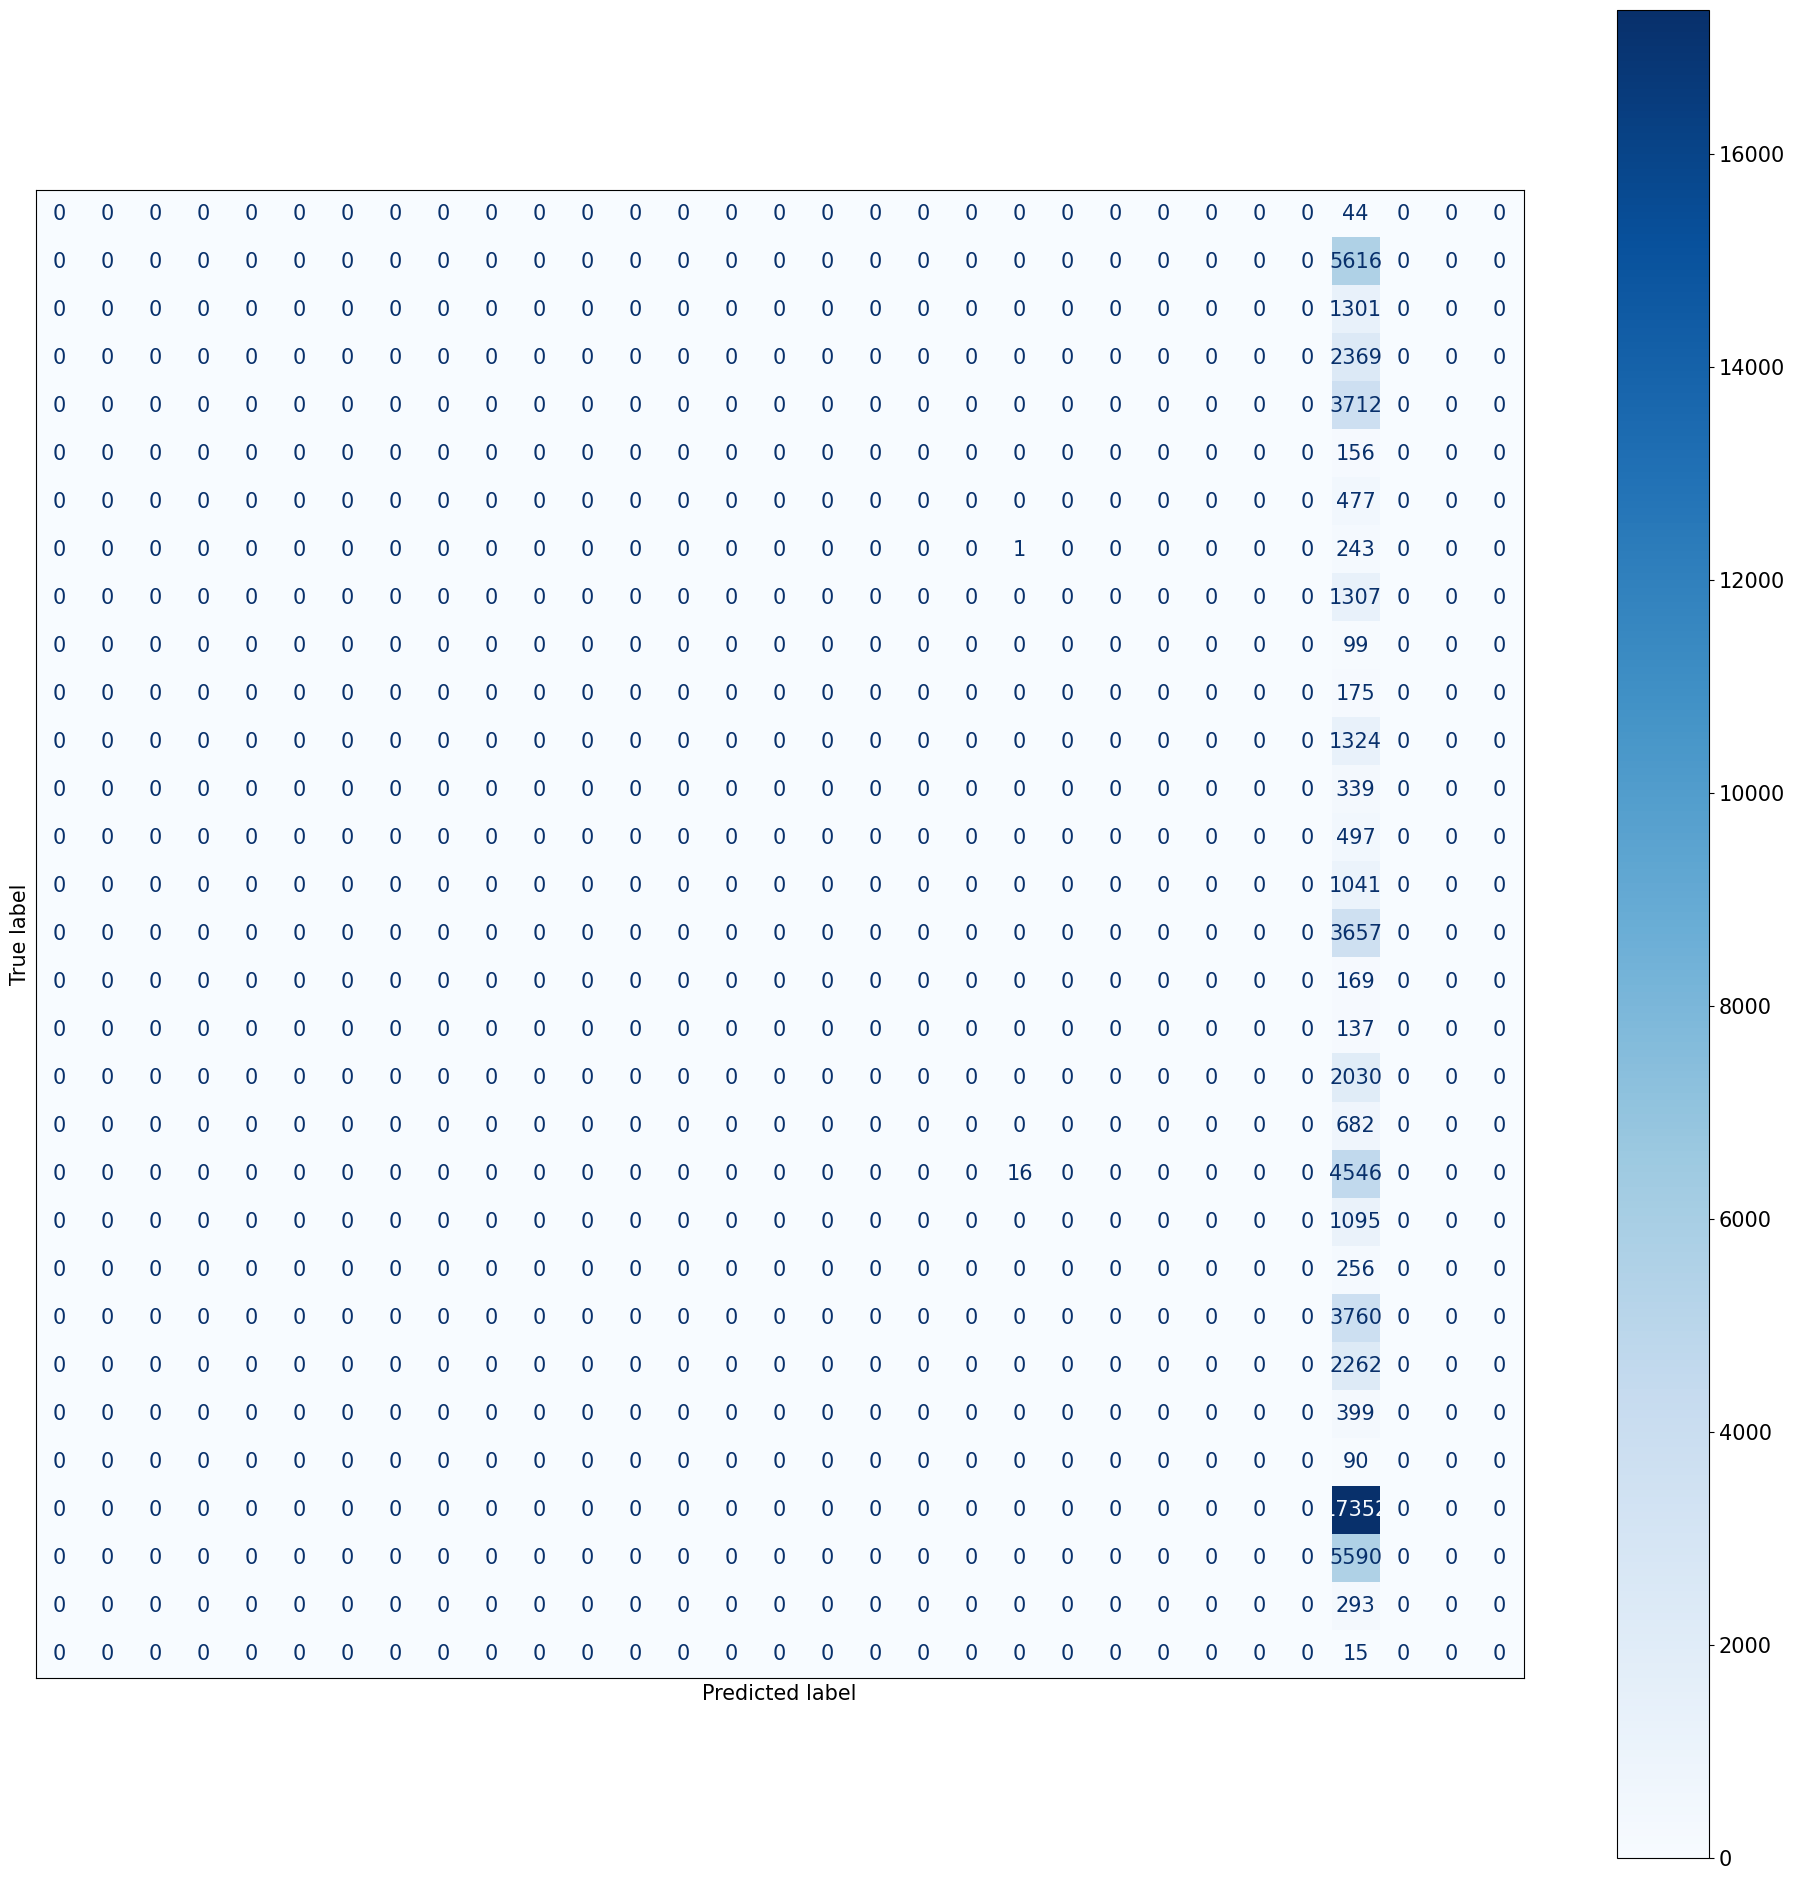

In [38]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
font={'size':'15'}
plt.rc('font',**font)
plt.rcParams['figure.figsize']=[24,24]
disp.plot(cmap='Blues',values_format='0.0f')
plt.gca().axes.get_xaxis().set_ticks([])
plt.gca().axes.get_yaxis().set_ticks([])
plt.show()

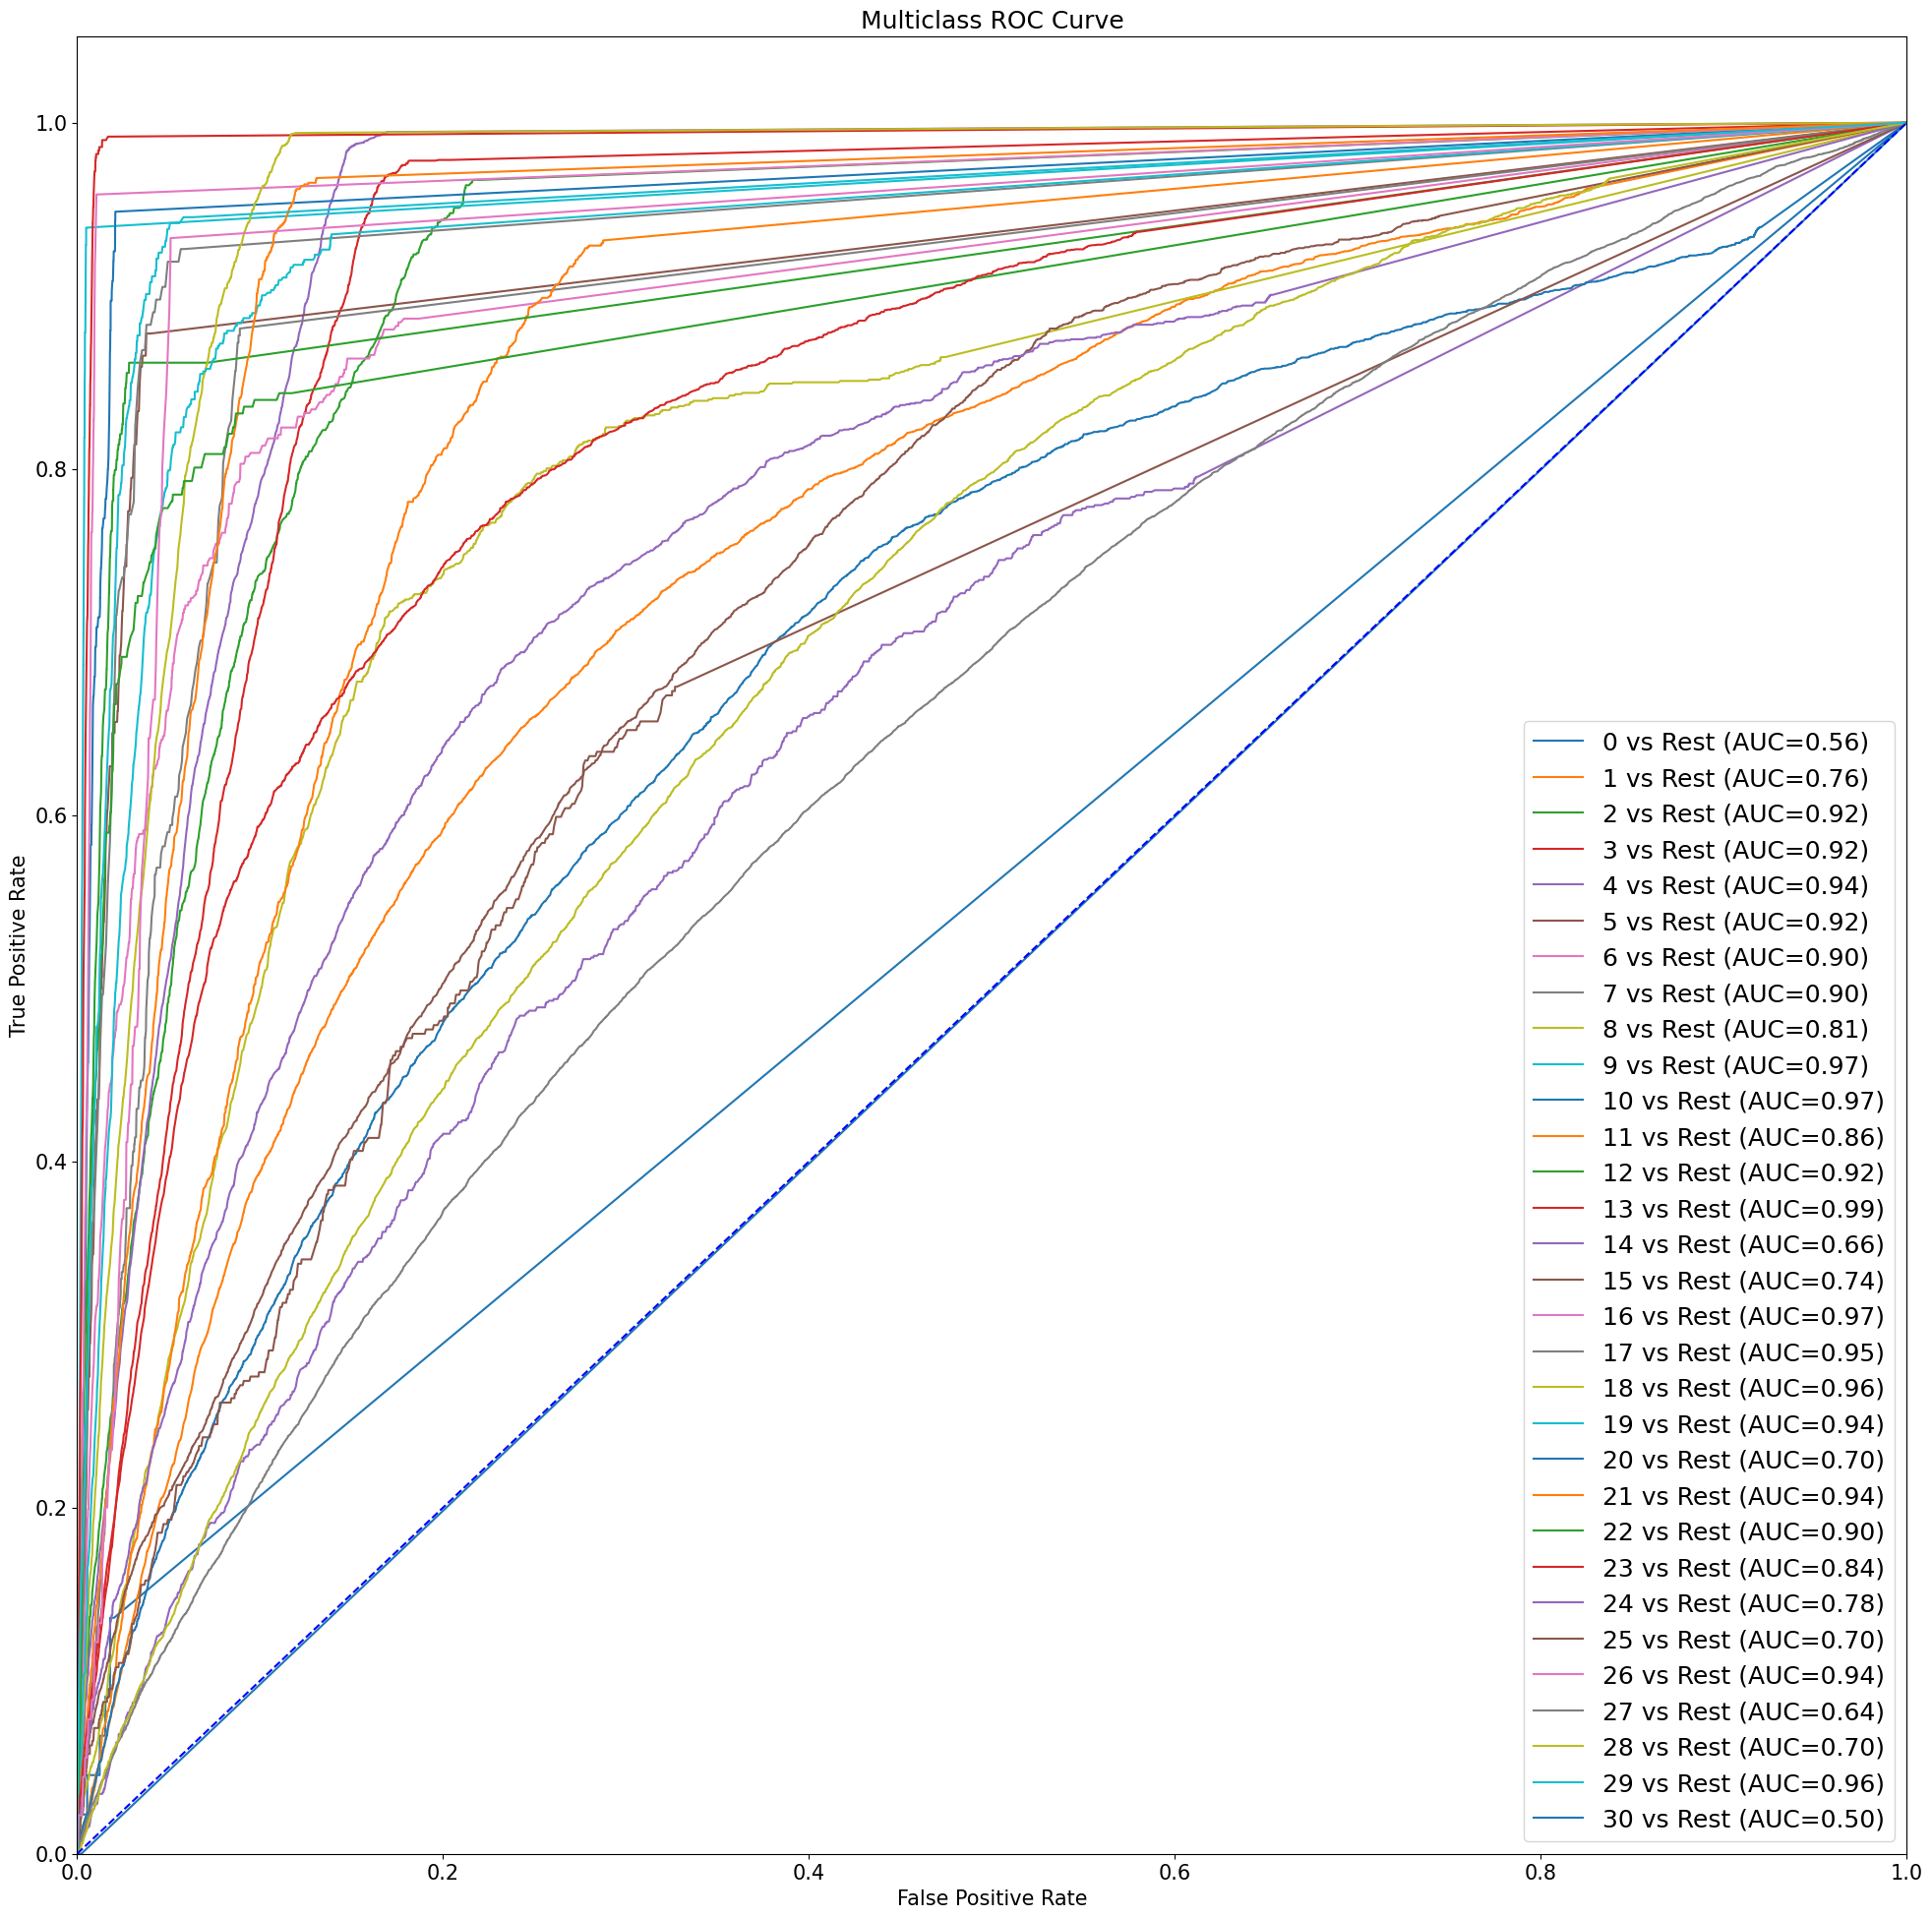

In [39]:
RF = OneVsRestClassifier(RandomForestClassifier())
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
pred_prob = RF.predict_proba(X_test)
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

n_class = y_test_binarized.shape[1]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:, i], pred_prob[:, i], drop_intermediate=False)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.plot(fpr[i], tpr[i], linestyle='-',
             label='%s vs Rest (AUC=%0.2f)' % (np.unique(y_test)[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'b--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right',fontsize=18)
plt.show()

### XGBoost 


In [40]:

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.06      0.02      0.03        44
           1       0.32      0.20      0.25      5616
           2       0.28      0.12      0.16      1301
           3       0.30      0.10      0.15      2369
           4       0.34      0.82      0.48      3712
           5       0.00      0.00      0.00       156
           6       0.31      0.04      0.07       477
           7       0.20      0.01      0.02       244
           8       0.13      0.01      0.02      1307
           9       0.24      0.10      0.14        99
          10       0.19      0.04      0.07       175
          11       0.25      0.00      0.00      1324
          12       0.27      0.24      0.26       339
          13       0.50      0.90      0.64       497
          14       0.14      0.00      0.00      1041
          15       0.36      0.08      0.13      3657
          16       0.18      0.33      0.24       169
          17       0.00    

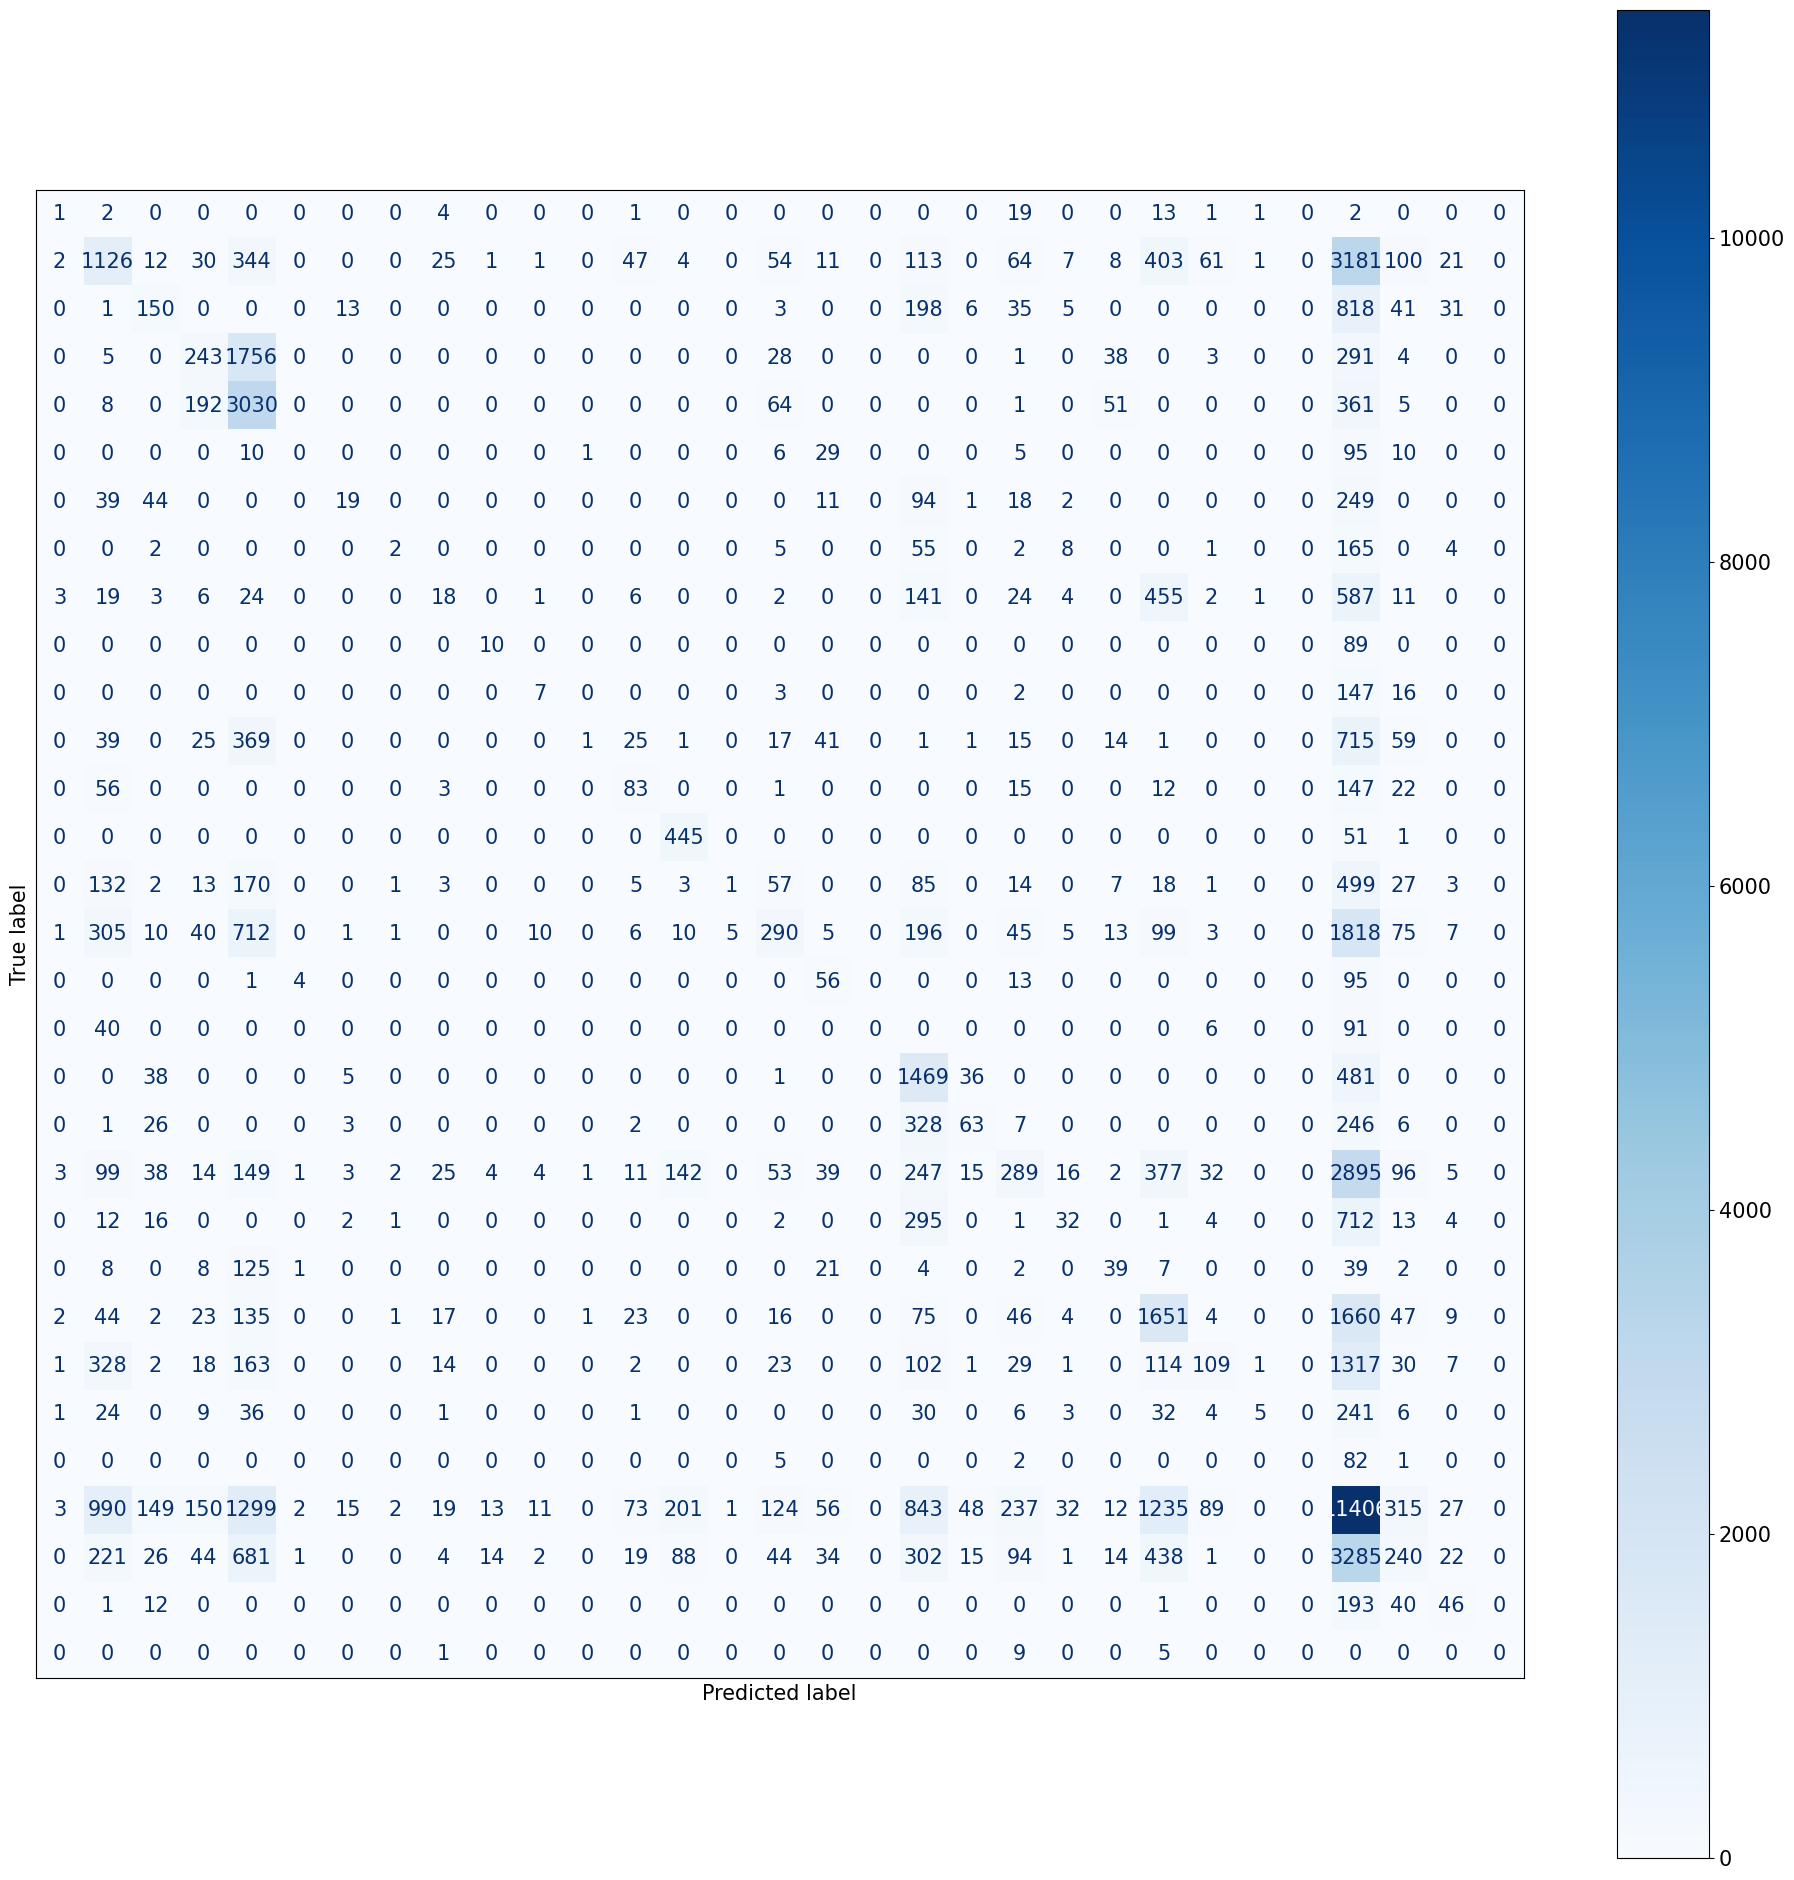

In [41]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
font={'size':'15'}
plt.rc('font',**font)
plt.rcParams['figure.figsize']=[24,24]
disp.plot(cmap='Blues',values_format='0.0f')
plt.gca().axes.get_xaxis().set_ticks([])
plt.gca().axes.get_yaxis().set_ticks([])
plt.show()

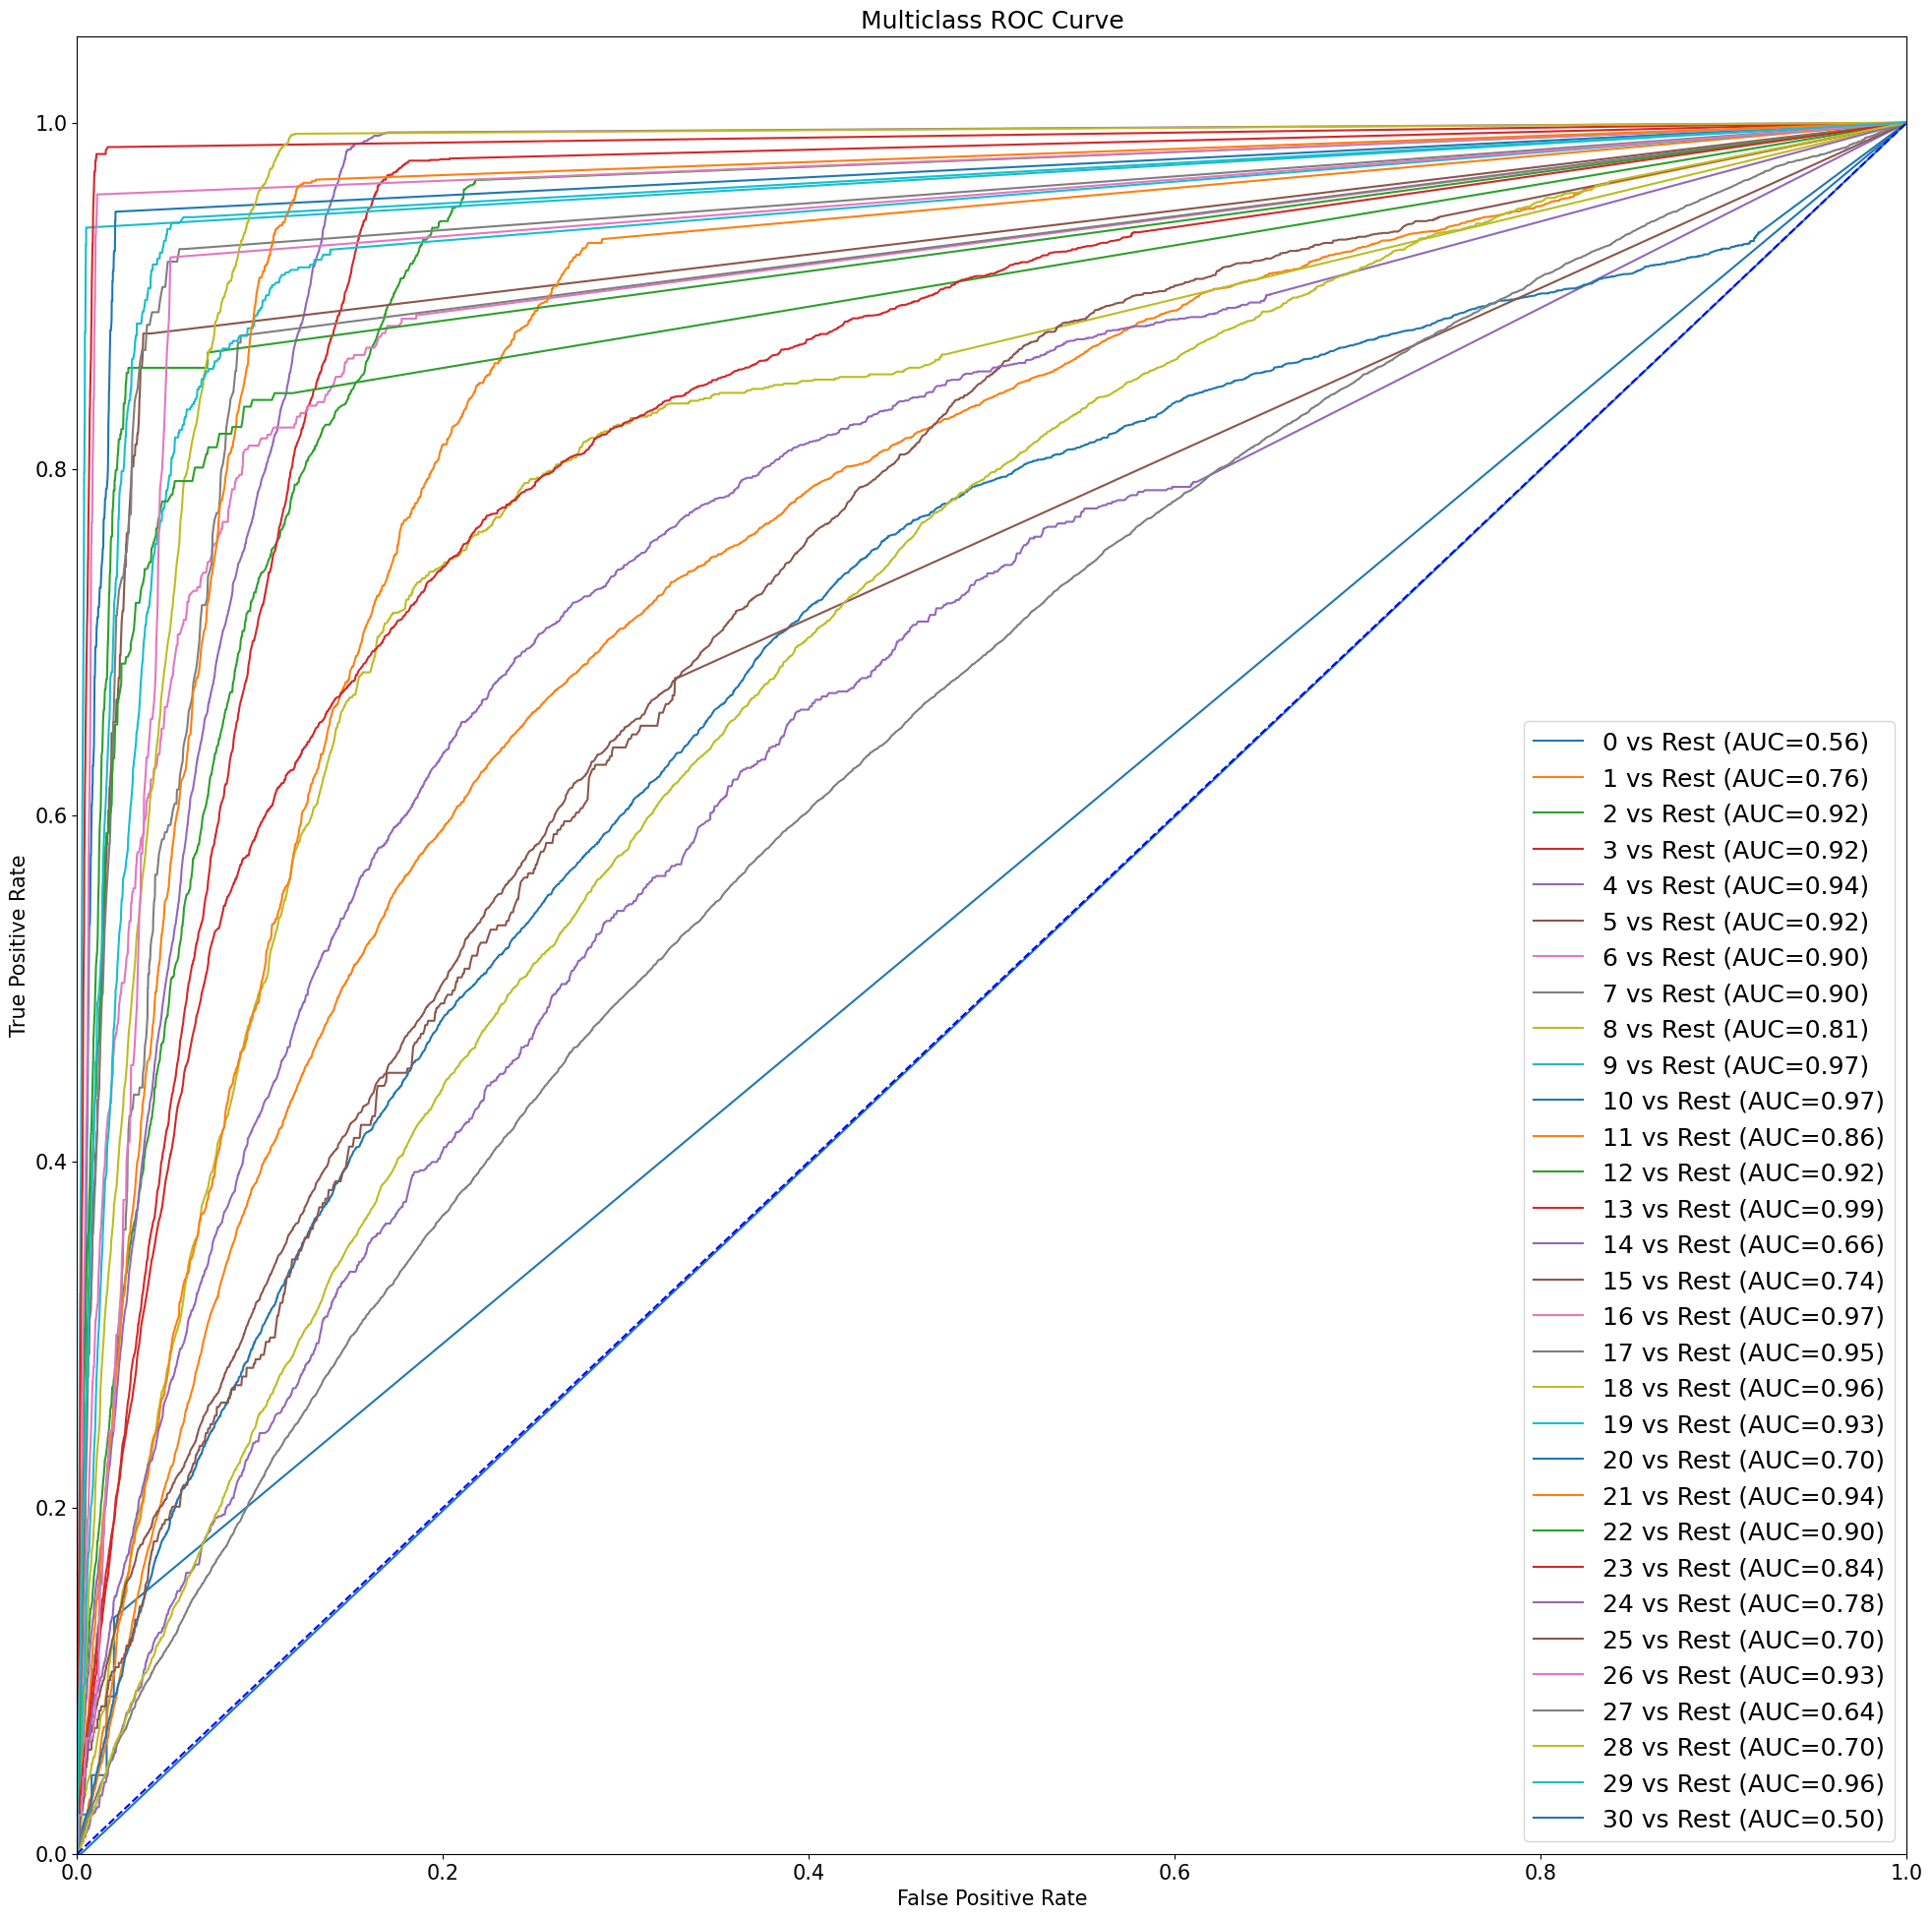

In [42]:
RF = OneVsRestClassifier(RandomForestClassifier())
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
pred_prob = RF.predict_proba(X_test)
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

n_class = y_test_binarized.shape[1]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:, i], pred_prob[:, i], drop_intermediate=False)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.plot(fpr[i], tpr[i], linestyle='-',
             label='%s vs Rest (AUC=%0.2f)' % (np.unique(y_test)[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'b--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right',fontsize=18)
plt.show()